In [1]:
import serial
import csv
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl as opp
import datetime

In [50]:


ser = serial.Serial('COM3', 9600) # Substitua 'COM3' pelo nome da porta serial do seu Arduino

data_atual = datetime.datetime.now()
nome_arquivo = f'dataset_{data_atual.strftime("%Y-%m-%d_%H-%M-%S")}.csv'

with open(nome_arquivo, 'w', newline='') as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv)
    escritor_csv.writerow(['Tempo', 'Tensao']) # Cabeçalho do CSV
    linha1 = ser.readline().decode('utf-8').strip()
    valores1 = linha1.split(',')
    first_time = valores1[0]

    while True:
        try:
            linha = ser.readline().decode('utf-8').strip()
            if linha:
                valores = linha.split(',')
                if len(valores) == 2:
                    tempo = (valores[0])
                    Tensao = (valores[1])
                    escritor_csv.writerow([tempo, Tensao])
        except KeyboardInterrupt:
            break

ser.close()

In [69]:
vibration_data = pd.read_csv('10P_AnalogRead.csv', sep=',')

In [70]:
tempo = vibration_data['Tempo']
tensao = vibration_data['Tensao']
vibration_data.to_csv('vibration_datawtime', index = False)

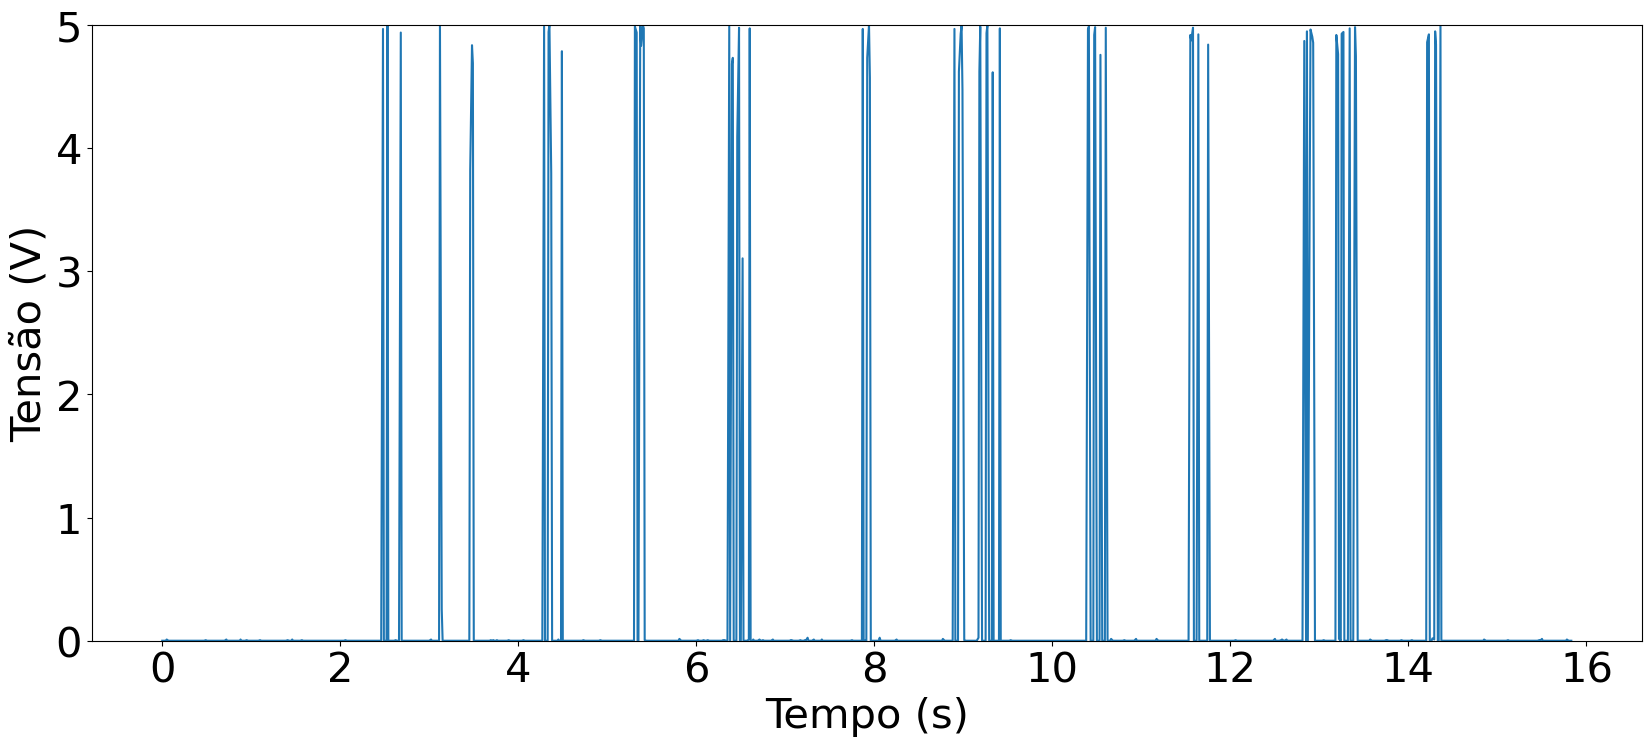

In [71]:
# Configurar o tamanho da imagem (largura x altura)
plt.figure(figsize=(20, 8))

plt.plot(vibration_data['Tempo'], vibration_data['Tensao'])

plt.xlabel('Tempo (s)', fontsize = 30)
plt.ylabel('Tensão (V)', fontsize = 30)
plt.xticks(fontsize=30)  # Aumenta o tamanho da fonte nos números do eixo x
plt.yticks(fontsize=30)  # Aumenta o tamanho da fonte nos números do eixo y
plt.gca().set_ylim(0, 5)  # Escala


# Adicionar um título ao gráfico

# Exibir o gráfico
plt.show()